Work on the Brooklyn Pedestrian Dataset: https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD

1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1

C:\Users\baodu\AppData\Local\Temp\ipykernel_17808\4141784079.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


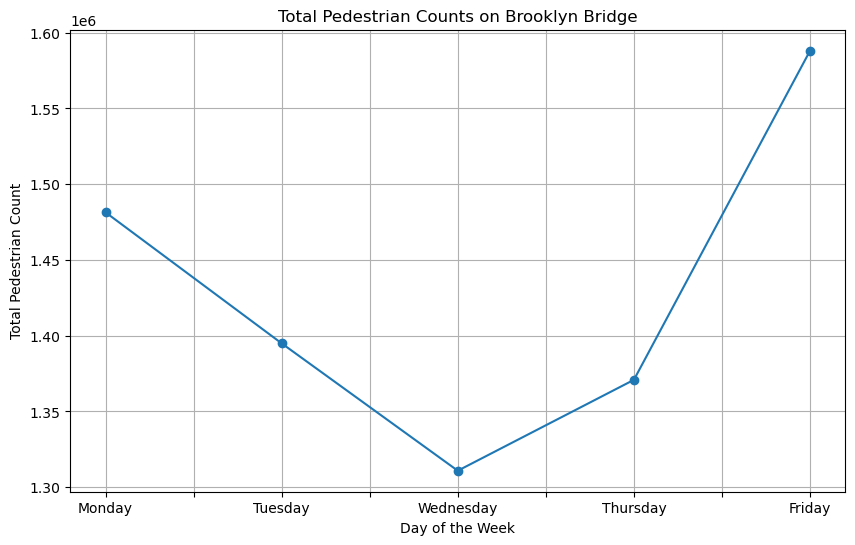

In [51]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD')
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()

weekday_df = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_counts = weekday_df.groupby('day_of_week')['Pedestrians'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title('Total Pedestrian Counts on Brooklyn Bridge')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

2

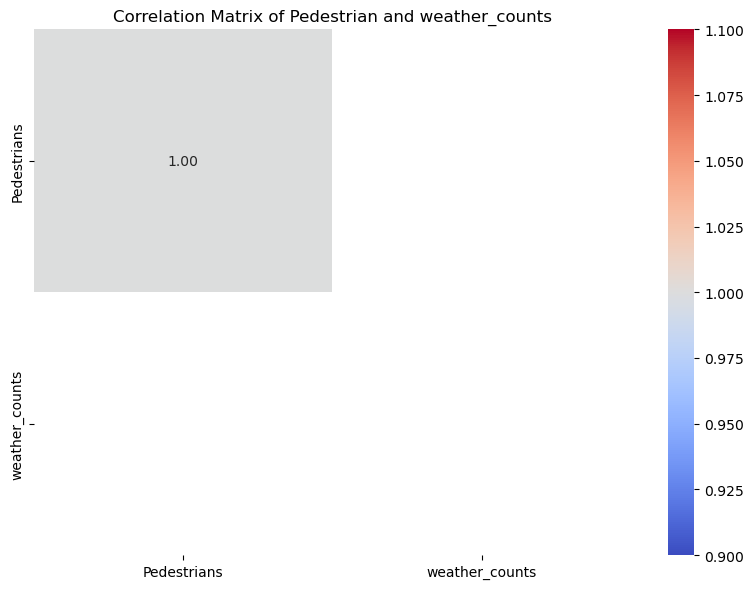

In [49]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]

df['weather_counts'] = df_2019.groupby('weather_summary')['Pedestrians'].sum().sort_values()


correlation_matrix = df[['Pedestrians','weather_counts']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrian and weather_counts')
plt.tight_layout()
plt.show()


3

In [50]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'


df['hour'] = df['hour_beginning'].dt.hour

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

print(time_of_day_counts)

time_of_day
Morning      2466776
Afternoon    5852025
Evening      2547548
Night         166517
Name: Pedestrians, dtype: int64
